# High Order Fuzzy Time Series by Hwang, Chen and Lee (1998)

Jeng-Ren Hwang, Shyi-Ming Chen, and Chia-Hoang Lee, “Handling forecasting problems using fuzzy time series,” 
Fuzzy Sets Syst., no. 100, pp. 217–228, 1998.

# Common Imports

In [1]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import hwang

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [2]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

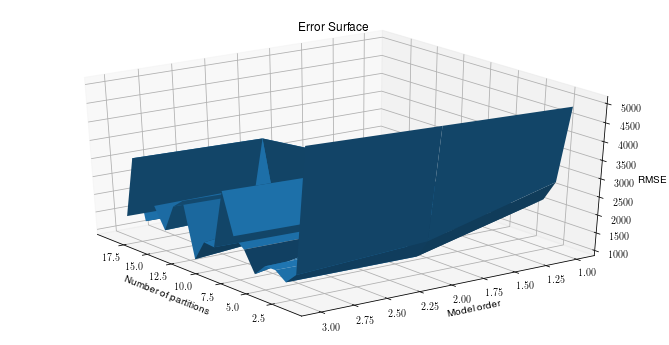

In [5]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, hwang.HighOrderFTS, range(1,20), [1, 2, 3], tam=[10, 5])

# Exploring the partitioning effects on transformed data

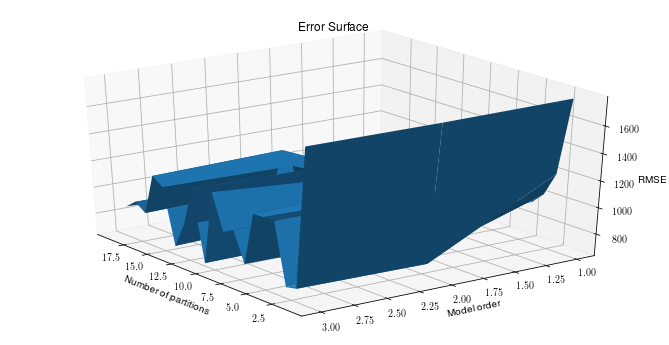

In [6]:
from pyFTS.common import Transformations
diff = Transformations.Differential(1)

tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, hwang.HighOrderFTS, range(1,20), [1, 2, 3], 
                              transformation=diff, tam=[10, 5])

# Comparing the partitioning schemas

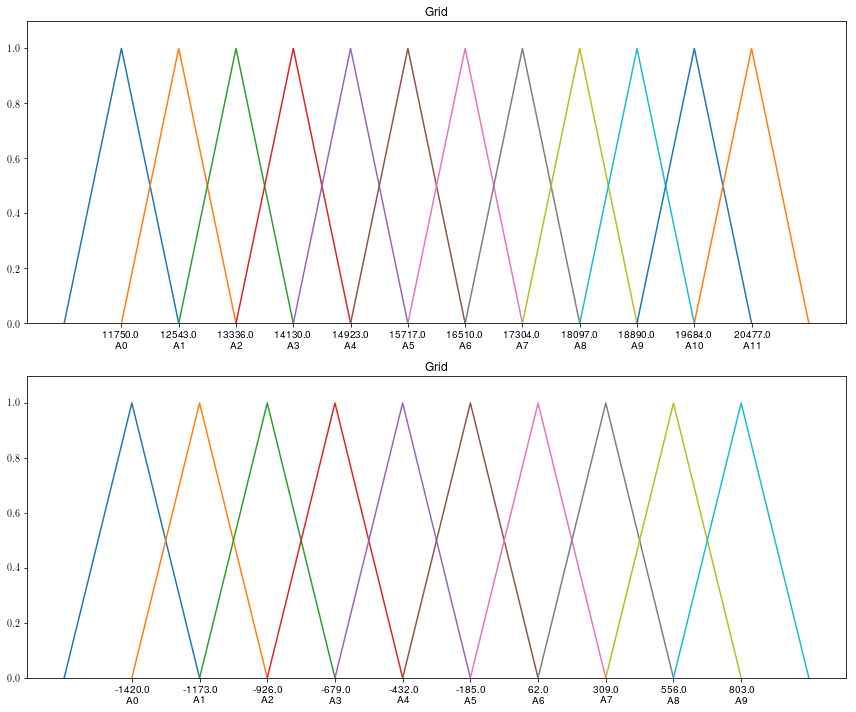

In [7]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(enrollments, 12)
fuzzy_sets2 = Grid.GridPartitioner(enrollments, 10, transformation=diff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [14]:
model1 = hwang.HighOrderFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments, order=2)

print(model1)

Hwang High Order FTS:



# Fitting a model on transformed data

In [10]:
model2 = hwang.HighOrderFTS("FTS Diff", partitioner=fuzzy_sets2)
model2.append_transformation(diff)
model2.fit(enrollments, order=3)

print(model2)

Hwang High Order FTS:



# Using the models

In [15]:
model1.predict(enrollments)

[16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334,
 16113.38333333334]

In [12]:
model2.predict(enrollments)

[12746.67,
 13254.67,
 13558.67,
 14387.67,
 15151.67,
 15002.67,
 15294.67,
 15552.67,
 16498.67,
 16610.67,
 16079.67,
 15124.67,
 15188.67,
 14836.67,
 14854.67,
 15675.67,
 16550.67,
 17841.67,
 18661.67,
 19019.67,
 19028.67,
 18567.67]

# Comparing the models

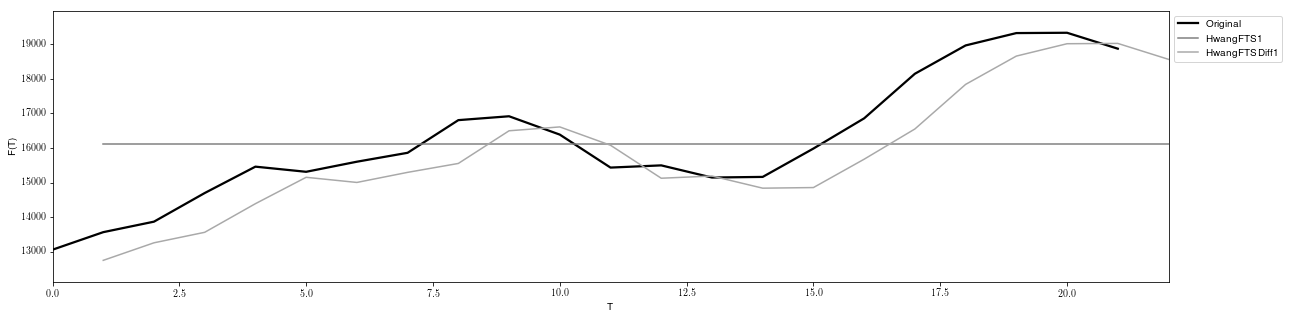

In [13]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [16]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
HwangFTS		& 1		& 1691.47		& 4.1		& 2.58	\\ 
HwangFTS Diff		& 1		& 808.61		& 2.17		& 1.32	\\ 



# Residual Analysis

In [12]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])

ValueError: cannot convert float NaN to integer